### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

### Refrescando sintaxis y teoria

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors
#Training the Data Model
lm.fit(X_train, y_train)
# Using our model to predict test values
predictions = lm.predict(X_test)


# Error Calculations
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Score of our model in %
lm.score(X_train, y_train) * 100 # Entrenamiento

### Ahora el ejercicio

In [1]:
# Importando librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/USA_Housing.csv")

In [3]:
# Dropping adress column, we don't need it
df = df.drop('Address', axis=1)

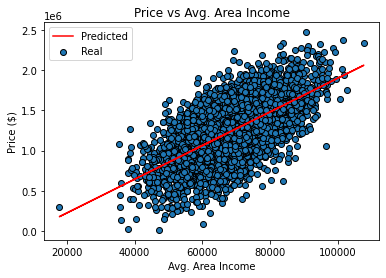

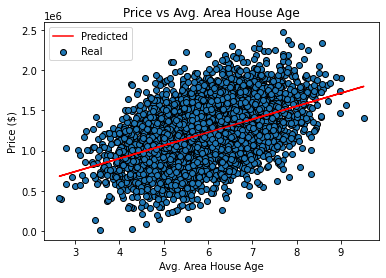

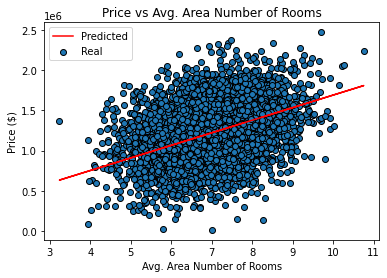

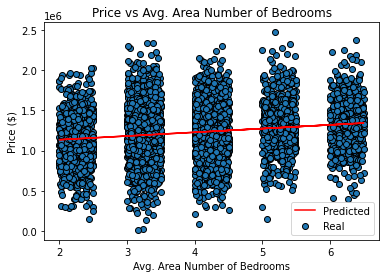

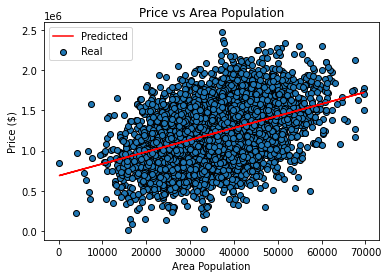

In [22]:
# Crear 5 modelos distintos en un mismo bucle

target = np.array(df['Price'])
for i, col in enumerate(df.columns[:-1]):
    globals()['x'+str(i)] = np.array(df[col]).reshape(-1, 1)
    # Splitting the data
    globals()['x_train' + str(i)], globals()['x_test' + str(i)], y_train, y_test = train_test_split(globals()['x'+str(i)], target, test_size=0.9, random_state=101)
    #creating LinearRegression Object
    lin_reg = LinearRegression(n_jobs=-1)  # -1 to use all processors
    #Training the Data Model
    lin_reg.fit(globals()['x_train'+str(i)], y_train)
    # Using our model to predict test values
    globals()['predictions' + str(i)] = lin_reg.predict(globals()['x_test' + str(i)])
    plt.figure()
    plt.plot(globals()['x_test' + str(i)], globals()['predictions' + str(i)], color='r')
    plt.title('Price vs ' + col)
    plt.xlabel(col)
    plt.ylabel('Price ($)')
    plt.scatter(globals()['x_test' + str(i)], y_test, edgecolors='black')
    plt.legend(['Predicted', 'Real'])